In [1]:
from IPython.display import HTML

HTML("""
<style>
div.text_cell_render {
    font-size: 11px !important;
    line-height: 1.2;
}

div.input_area pre {
    font-size: 7px !important;
}
div.highlight pre {
    font-size: 7px !important;
}

div.output_area pre,
div.output pre,
pre {
    font-size: 6px !important;
    line-height: 1 !important;
    white-space: pre-wrap !important;  /* optional: wraps long lines */
}
.jp-CodeCell .jp-InputPrompt,
div.prompt.input_prompt {
    font-size: 6px !important;
    padding-right: 2px !important;
    color: #888 !important;
}

.jp-OutputPrompt,
div.prompt.output_prompt {
    font-size: 6px !important;
    padding-right: 2px !important;
    color: #888 !important;
}
</style>
""")


## Problem Statement ##
Construct a linear regression that reflects the relationship .
## Variables and Parameters ##
|         Description         |   Symbol   |    Dimension    |         Type         |
|:---------------------------:|:----------:|:---------------:|:--------------------:|
|        Sleep Quality        |   $X_1$    |        1        | Independent Variable |
| Length of Physical Activity |   $X_2$    |     $mins$      | Independent Variable |
|        Stress Level         |   $X_3$    |        1        | Independent Variable |
|                             | $\beta _0$ |        1        |   Model Parameter    |
|                             | $\beta _1$ |       $h$       |   Model Parameter    |
|                             | $\beta _2$ | $\frac{h}{min}$ |   Model Parameter    |
|                             | $\beta _3$ |       $h$       |   Model Parameter    |

## Assumptions and Constraints ##

In [4]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy.stats import poisson
from scipy.stats import norm
%matplotlib inline

In [11]:
sleep_df = pd.read_csv("data/Sleep.csv")
x = sleep_df[["Quality", "Physical_Activity", "Stress"]]
Y = sleep_df["Duration"]

In [19]:
x.iloc[:,1]

0      42
1      60
2      60
3      30
4      30
       ..
369    75
370    75
371    75
372    75
373    75
Name: Physical_Activity, Length: 374, dtype: int64

Regular Linear Regression $Y=\beta _0 + \beta _1 X_1 +\beta _2 X_2 + \beta _3 X_3$

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     450.5
Date:                Sat, 22 Nov 2025   Prob (F-statistic):          4.13e-123
Time:                        21:40:27   Log-Likelihood:                -157.20
No. Observations:                 374   AIC:                             322.4
Df Residuals:                     370   BIC:                             338.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.6737      0.40

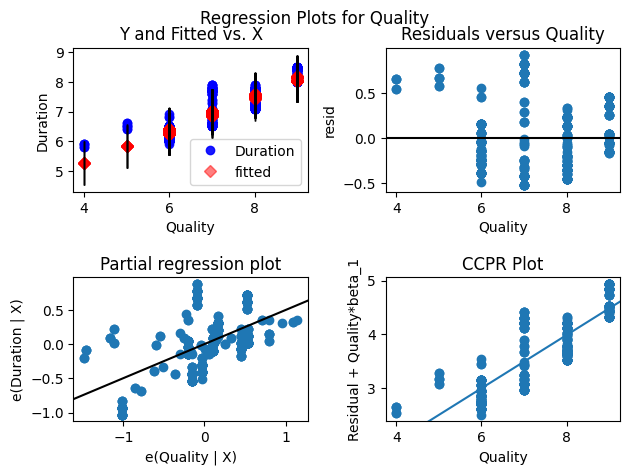

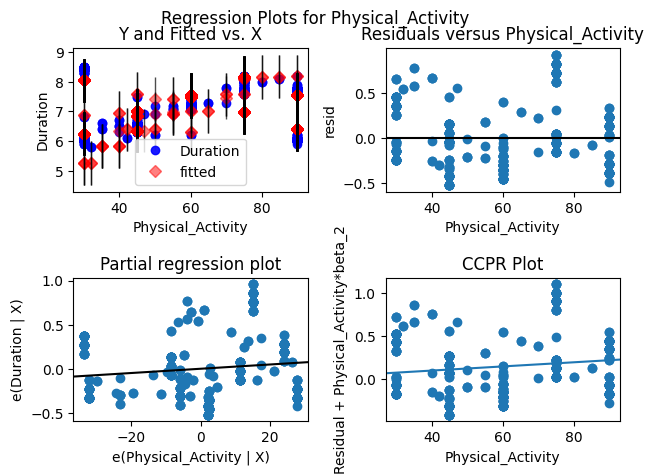

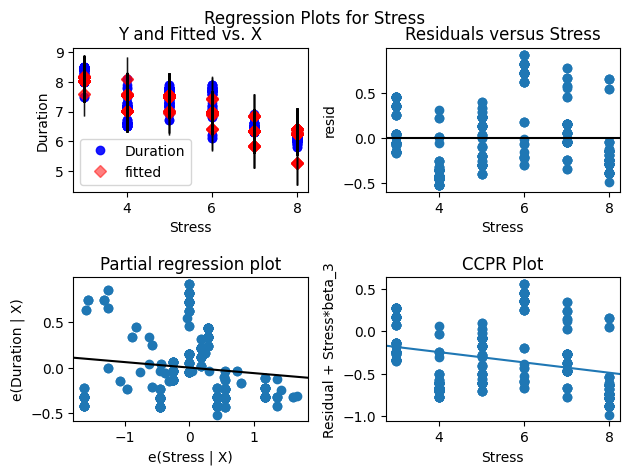

In [24]:
X = sm.add_constant(X)

reg_original = sm.OLS(Y,X).fit()
sm.graphics.plot_regress_exog(reg_original,"Quality")
sm.graphics.plot_regress_exog(reg_original,"Physical_Activity")
sm.graphics.plot_regress_exog(reg_original,"Stress")
summary_table=reg_original.summary()
print(summary_table)

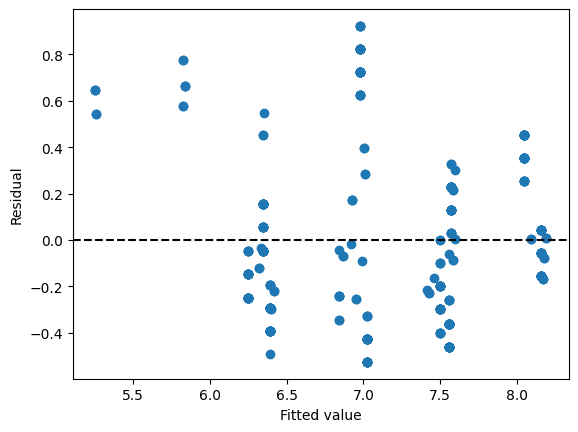

In [25]:

fitted_y = reg_original.fittedvalues

residuals = reg_original.resid

plt.scatter(fitted_y, residuals)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

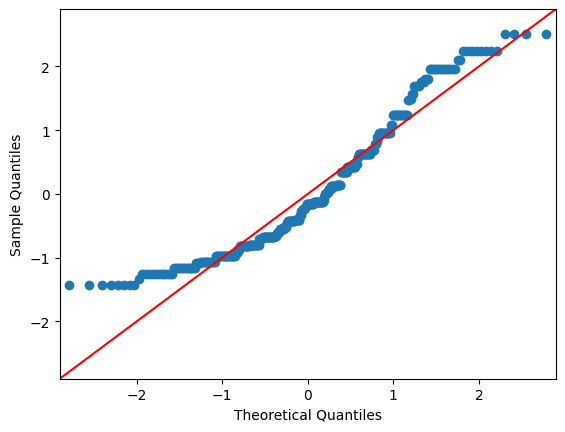

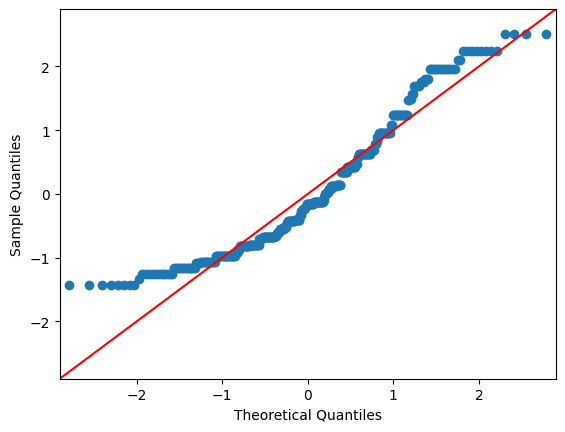

In [27]:
sm.qqplot(residuals, fit=True, line="45")

$Y=\beta _0 + \beta _1 X_1 +\beta _2 \sqrt X_2 + \beta _3 X_3$

In [17]:
Stress_sqrt=np.zeros(len(sleep_df["Stress"]))
for i in range(len(sleep_df["Stress"])):
    Stress_sqrt[i]=sleep_df["Stress"][i]**0.5
sleep_df["Stress Sqrt"]=Stress_sqrt
X = sleep_df[["Quality", "Physical_Activity", "Stress Sqrt"]]


In [24]:
X= sm.add_constant(X)
reg_stress_sqrt = sm.OLS(Y,X).fit()
summary_table_stress_sqrt = reg_stress_sqrt.summary()
print(summary_table_stress_sqrt)

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     448.0
Date:                Thu, 20 Nov 2025   Prob (F-statistic):          9.10e-123
Time:                        23:06:48   Log-Likelihood:                -158.00
No. Observations:                 374   AIC:                             324.0
Df Residuals:                     370   BIC:                             339.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.8113      0.54

$Y=\beta _0 + \beta _1 X_1 +\beta _2 X_2^2 + \beta _3 X_3$

In [32]:
Stress_sq = np.zeros(len(sleep_df["Stress"]))
for i in range(len(sleep_df["Stress"])):
    Stress_sq[i] = sleep_df["Stress"][i] ** 2
sleep_df["Stress Sq"] = Stress_sq
X = sleep_df[["Quality", "Physical_Activity", "Stress Sq"]]


In [33]:
X= sm.add_constant(X)
reg_stress_sq = sm.OLS(Y,X).fit()
summary_table_stress_sq = reg_stress_sq.summary()
print(summary_table_stress_sq)


                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     450.5
Date:                Thu, 20 Nov 2025   Prob (F-statistic):          4.13e-123
Time:                        23:13:22   Log-Likelihood:                -157.20
No. Observations:                 374   AIC:                             322.4
Df Residuals:                     370   BIC:                             338.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.6737      0.40

$Y=\beta _0 + \beta _1 Log(X_1) +\beta _2 X_2 + \beta _3 X_3$

In [34]:
Quality_log = np.zeros(len(sleep_df["Quality"]))
for i in range(len(sleep_df["Quality"])):
    Quality_log[i] = np.log(sleep_df["Quality"][i])
sleep_df["Quality Log"] = Quality_log
X = sleep_df[["Quality Log", "Physical_Activity", "Stress Sq"]]


In [35]:
X= sm.add_constant(X)
reg_quality_log = sm.OLS(Y,X).fit()
summary_table_quality_log = reg_quality_log.summary()
print(summary_table_quality_log)


                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     397.0
Date:                Thu, 20 Nov 2025   Prob (F-statistic):          2.96e-115
Time:                        23:15:40   Log-Likelihood:                -175.50
No. Observations:                 374   AIC:                             359.0
Df Residuals:                     370   BIC:                             374.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.9659      0.64

$Y=\beta _0 + \beta _1 X_1^2 +\beta _2 X_2 + \beta _3 X_3$

In [36]:
Quality_sq = np.zeros(len(sleep_df["Quality"]))
for i in range(len(sleep_df["Quality"])):
    Quality_sq[i] = sleep_df["Quality"][i]**2
sleep_df["Quality Sq"] = Quality_sq
X = sleep_df[["Quality Sq", "Physical_Activity", "Stress Sq"]]


In [37]:
X= sm.add_constant(X)
reg_quality_sq = sm.OLS(Y,X).fit()
summary_table_quality_sq = reg_quality_sq.summary()
print(summary_table_quality_log)

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     397.0
Date:                Thu, 20 Nov 2025   Prob (F-statistic):          2.96e-115
Time:                        23:15:40   Log-Likelihood:                -175.50
No. Observations:                 374   AIC:                             359.0
Df Residuals:                     370   BIC:                             374.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.9659      0.64

$Log(Y)=\beta _0 + \beta _1 X_1 +\beta _2 X_2^2 + \beta _3 X_3$

In [21]:
X = sleep_df[["Quality", "Physical_Activity", "Stress"]]
Y = sleep_df["Duration"]

In [22]:
X = sm.add_constant(X)
Y_log = np.log(Y)

In [23]:
reg_logY = sm.OLS(Y_log,X).fit()

summary_table_log_Y=reg_logY.summary()
print(summary_table_log_Y)

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     461.5
Date:                Thu, 20 Nov 2025   Prob (F-statistic):          1.21e-124
Time:                        23:06:25   Log-Likelihood:                 578.85
No. Observations:                 374   AIC:                            -1150.
Df Residuals:                     370   BIC:                            -1134.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.5063      0.07

$\sqrt(Y)=\beta _0 + \beta _1 X_1 +\beta _2 X_2^2 + \beta _3 X_3$

In [28]:
X = sm.add_constant(X)
Y_sqrt = np.sqrt(Y)

In [29]:
reg_Y_sqrt= sm.OLS(Y_sqrt,X).fit()

summary_table_sqrtY=reg_Y_sqrt.summary()
print(summary_table_sqrtY)

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     459.3
Date:                Sat, 22 Nov 2025   Prob (F-statistic):          2.41e-124
Time:                        21:50:02   Log-Likelihood:                 471.58
No. Observations:                 374   AIC:                            -935.2
Df Residuals:                     370   BIC:                            -919.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.0336      0.07

In [55]:
Stress_sqrt=np.zeros(len(sleep_df["Stress"]))
for i in range(len(sleep_df["Stress"])):
    Stress_sqrt[i]=sleep_df["Stress"][i]**0.5
sleep_df["Stress Sqrt"]=Stress_sqrt

Stress_sq = np.zeros(len(sleep_df["Stress"]))
for i in range(len(sleep_df["Stress"])):
    Stress_sq[i] = sleep_df["Stress"][i] ** 2
sleep_df["Stress Sq"] = Stress_sq

Quality_log = np.zeros(len(sleep_df["Quality"]))
for i in range(len(sleep_df["Quality"])):
    Quality_log[i] = np.log(sleep_df["Quality"][i])
sleep_df["Quality Log"] = Quality_log

Quality_sq = np.zeros(len(sleep_df["Quality"]))
for i in range(len(sleep_df["Quality"])):
    Quality_sq[i] = sleep_df["Quality"][i]**2
sleep_df["Quality Sq"] = Quality_sq

Y = sleep_df["Duration"]
Y_log = np.log(Y)
Y_sqrt = np.sqrt(Y)

In [67]:
X1s = ["Quality","Quality Log","Quality Sq"]
X3s = ["Stress","Stress Sqrt","Stress Sq"]
Ys= [Y,Y_log,Y_sqrt]

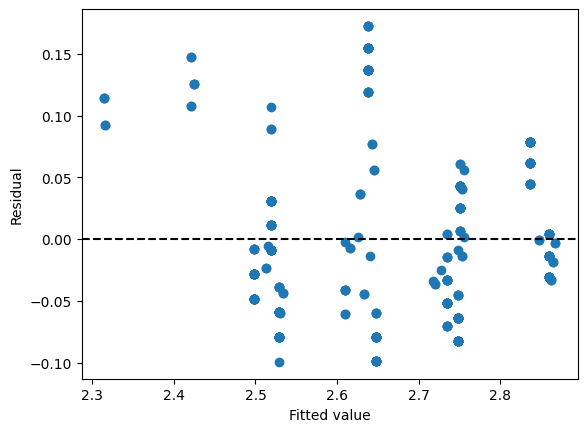

QQ plot for X=sleep_df[[X1s[0],X2,X3s[0]]], Y=Ys[0]


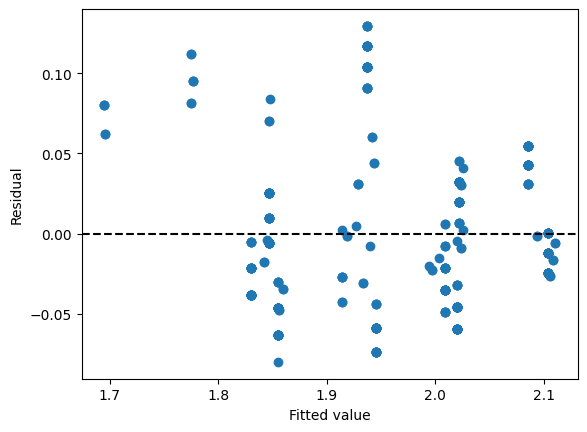

QQ plot for X=sleep_df[[X1s[0],X2,X3s[0]]], Y=Ys[1]


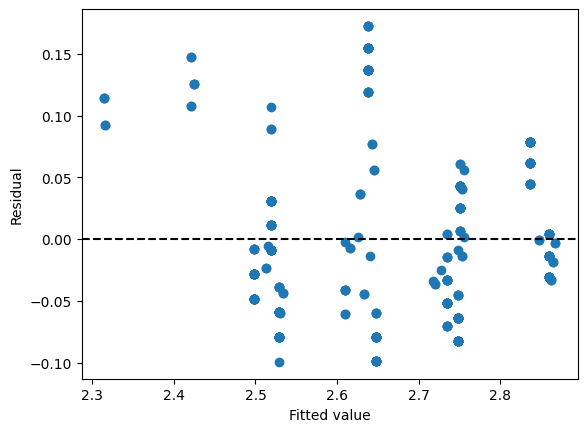

QQ plot for X=sleep_df[[X1s[0],X2,X3s[0]]], Y=Ys[2]


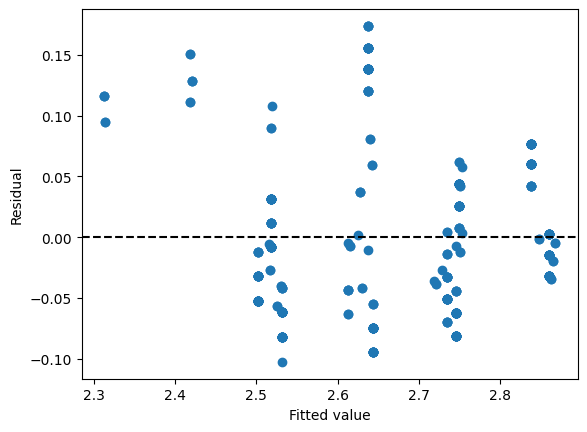

QQ plot for X=sleep_df[[X1s[0],X2,X3s[1]]], Y=Ys[0]


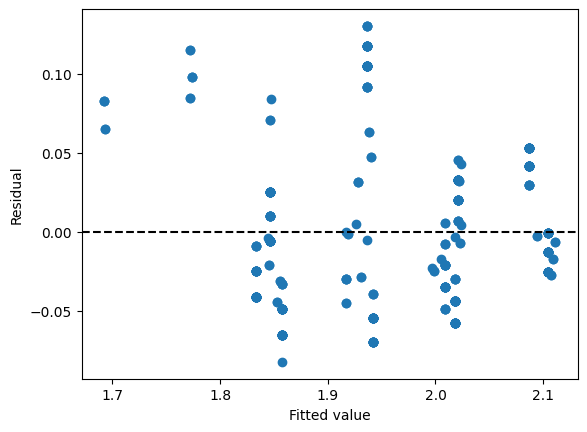

QQ plot for X=sleep_df[[X1s[0],X2,X3s[1]]], Y=Ys[1]


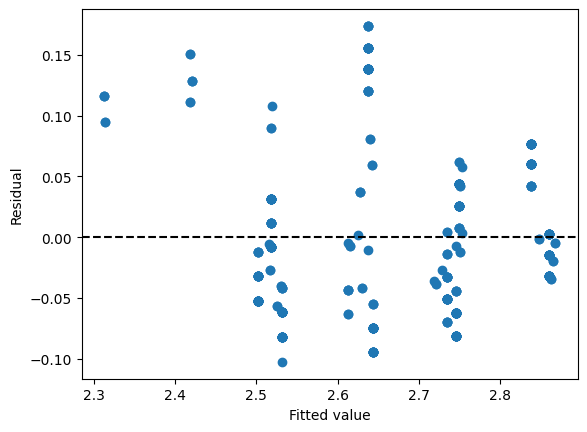

QQ plot for X=sleep_df[[X1s[0],X2,X3s[1]]], Y=Ys[2]


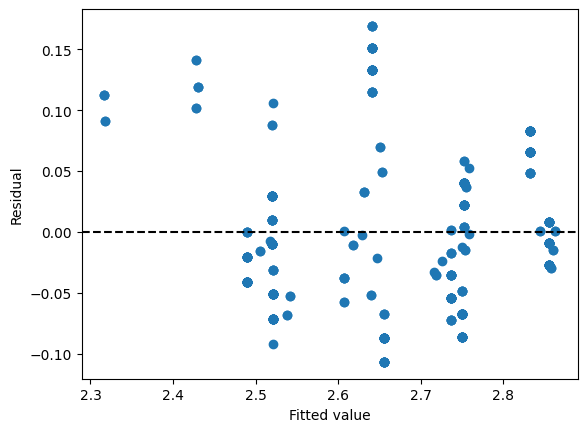

QQ plot for X=sleep_df[[X1s[0],X2,X3s[2]]], Y=Ys[0]


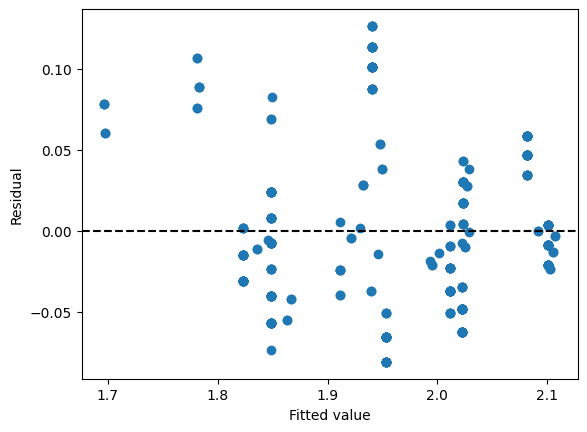

QQ plot for X=sleep_df[[X1s[0],X2,X3s[2]]], Y=Ys[1]


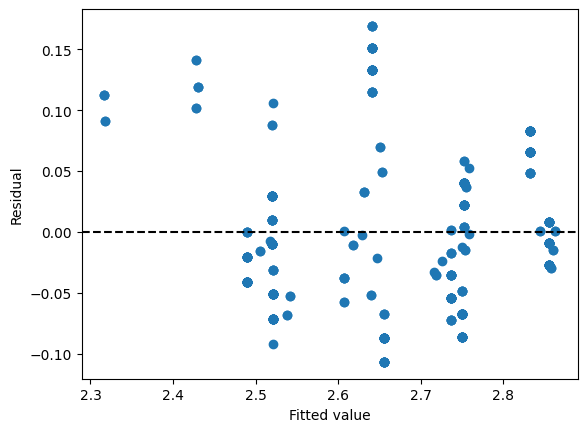

QQ plot for X=sleep_df[[X1s[0],X2,X3s[2]]], Y=Ys[2]


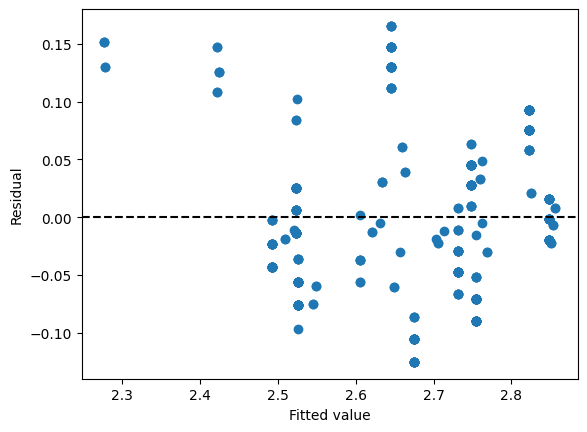

QQ plot for X=sleep_df[[X1s[1],X2,X3s[0]]], Y=Ys[0]


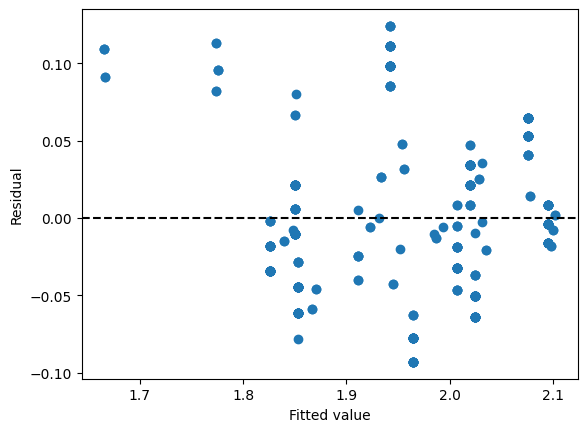

QQ plot for X=sleep_df[[X1s[1],X2,X3s[0]]], Y=Ys[1]


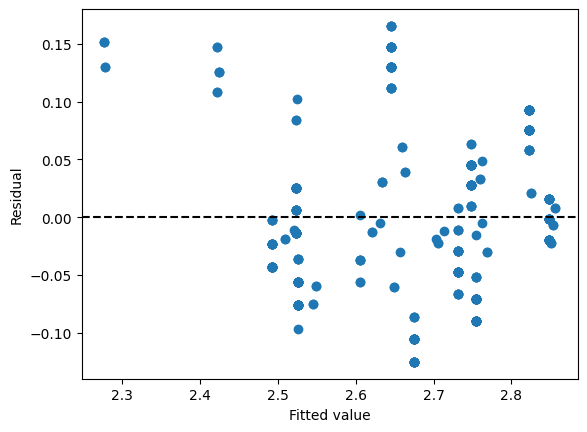

QQ plot for X=sleep_df[[X1s[1],X2,X3s[0]]], Y=Ys[2]


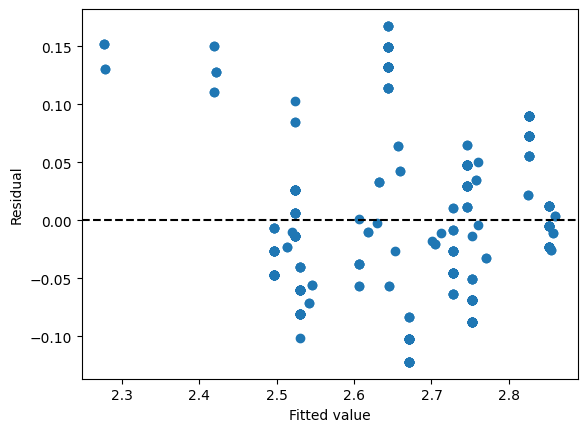

QQ plot for X=sleep_df[[X1s[1],X2,X3s[1]]], Y=Ys[0]


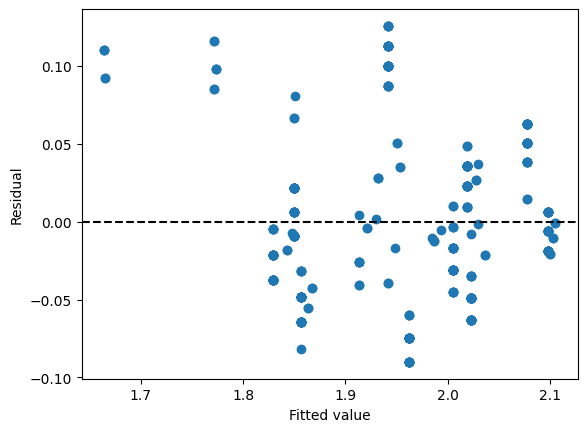

QQ plot for X=sleep_df[[X1s[1],X2,X3s[1]]], Y=Ys[1]


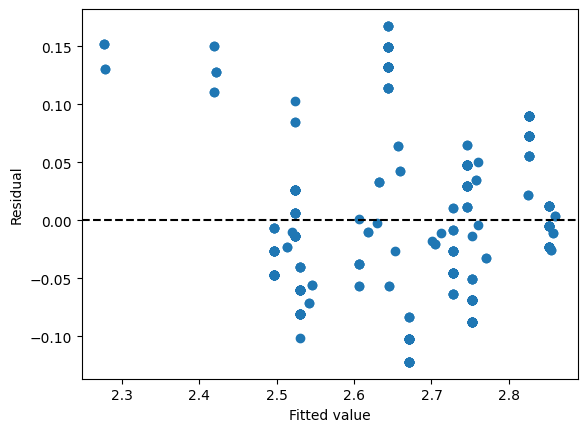

QQ plot for X=sleep_df[[X1s[1],X2,X3s[1]]], Y=Ys[2]


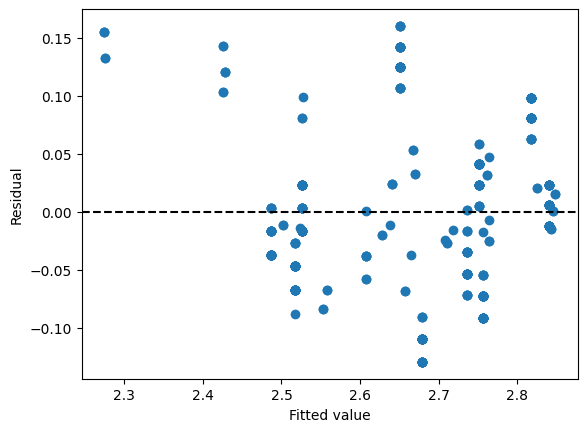

QQ plot for X=sleep_df[[X1s[1],X2,X3s[2]]], Y=Ys[0]


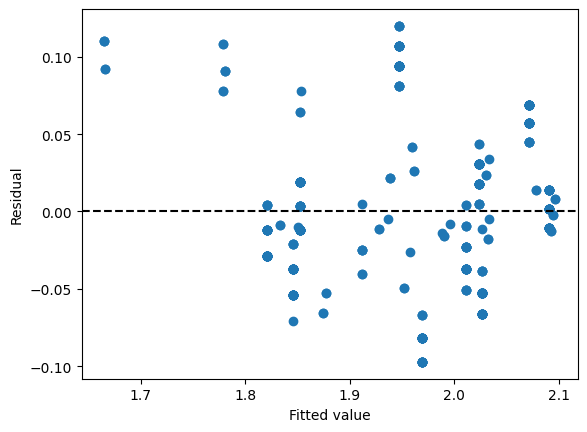

QQ plot for X=sleep_df[[X1s[1],X2,X3s[2]]], Y=Ys[1]


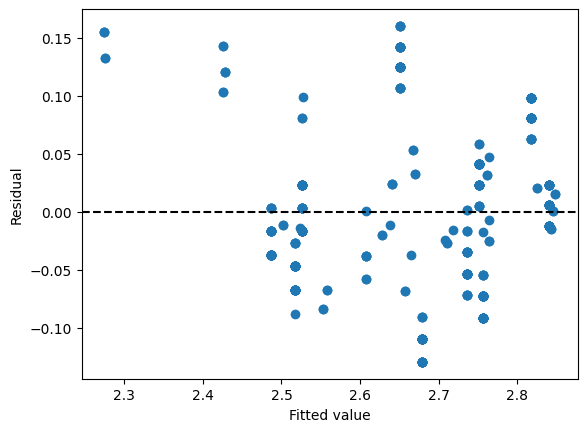

QQ plot for X=sleep_df[[X1s[1],X2,X3s[2]]], Y=Ys[2]


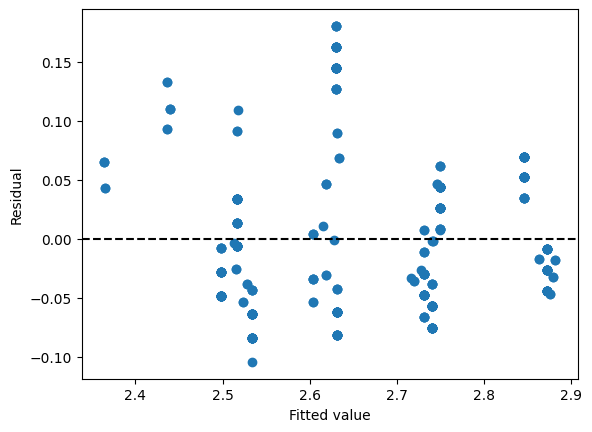

QQ plot for X=sleep_df[[X1s[2],X2,X3s[0]]], Y=Ys[0]


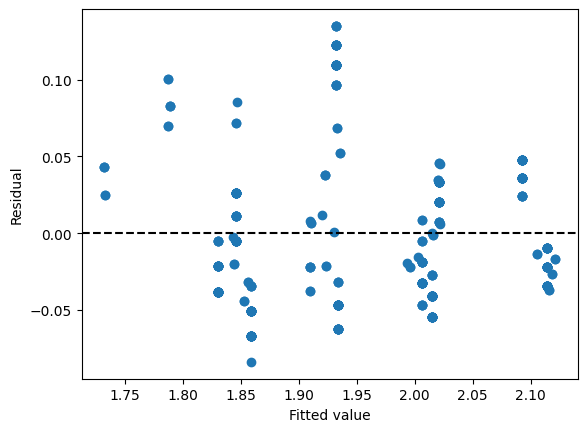

QQ plot for X=sleep_df[[X1s[2],X2,X3s[0]]], Y=Ys[1]


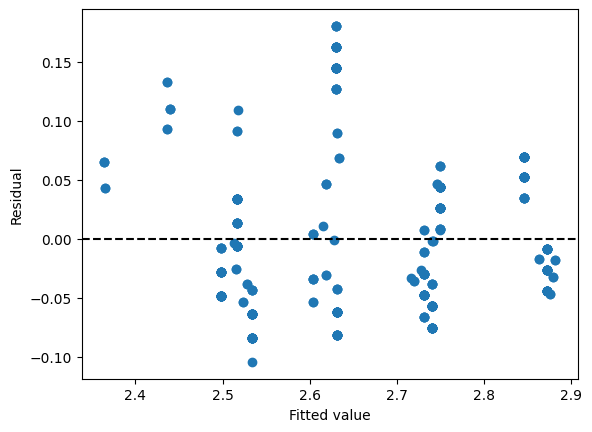

QQ plot for X=sleep_df[[X1s[2],X2,X3s[0]]], Y=Ys[2]


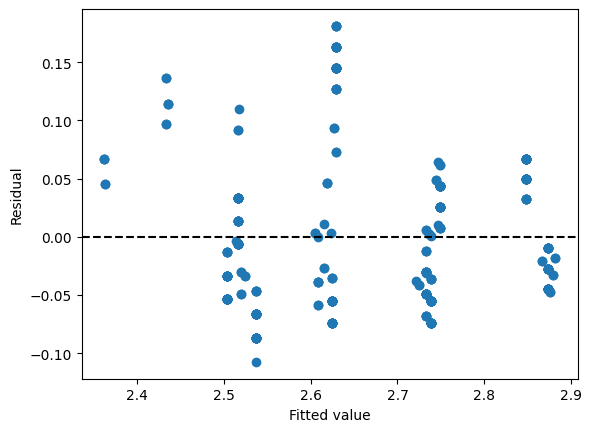

QQ plot for X=sleep_df[[X1s[2],X2,X3s[1]]], Y=Ys[0]


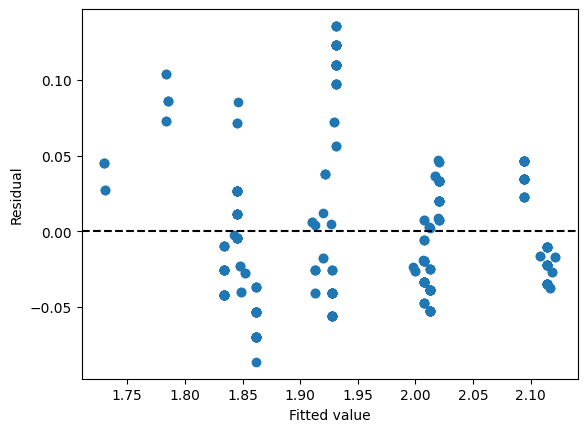

QQ plot for X=sleep_df[[X1s[2],X2,X3s[1]]], Y=Ys[1]


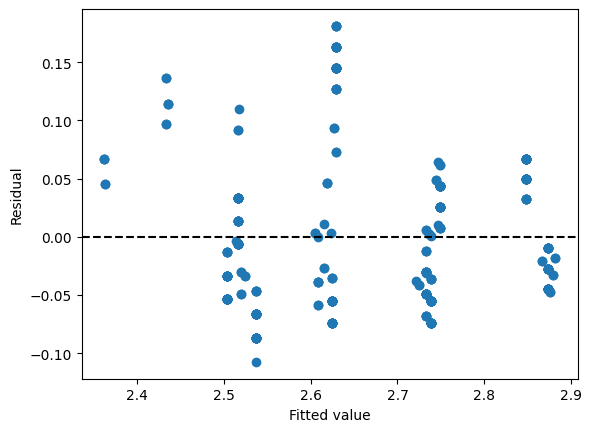

QQ plot for X=sleep_df[[X1s[2],X2,X3s[1]]], Y=Ys[2]


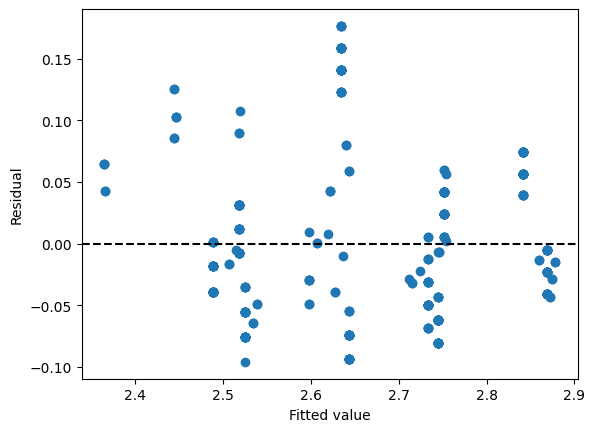

QQ plot for X=sleep_df[[X1s[2],X2,X3s[2]]], Y=Ys[0]


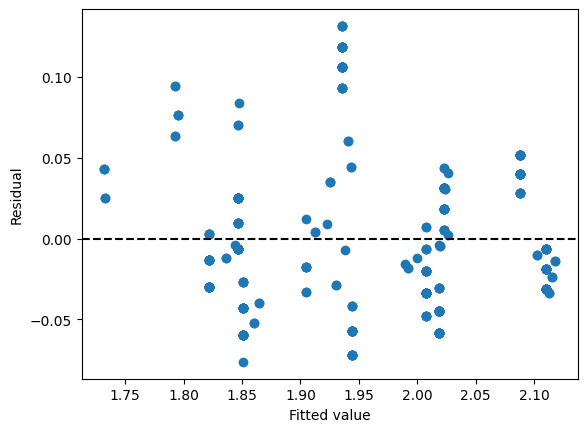

QQ plot for X=sleep_df[[X1s[2],X2,X3s[2]]], Y=Ys[1]


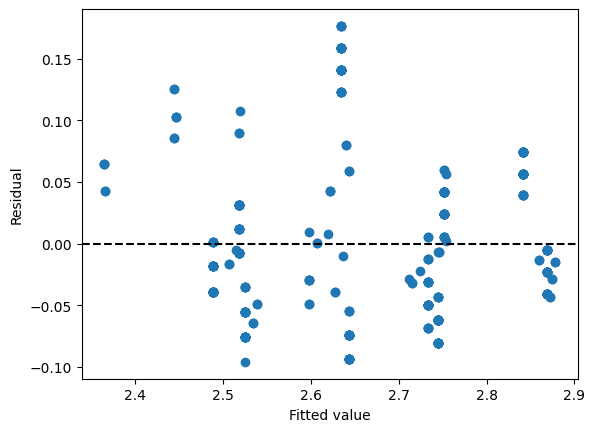

QQ plot for X=sleep_df[[X1s[2],X2,X3s[2]]], Y=Ys[2]


In [103]:
for i in range(len(X1s)):
        for k  in range(len(X3s)):
            for h in range(len(Ys)):
                X = sleep_df[[X1s[i],"Physical_Activity",X3s[k]]]
                Y=Ys[h]
                X = sm.add_constant(X)
                reg = sm.OLS(Y,X).fit()
                #sm.graphics.plot_regress_exog(reg,X1s[i])
                #sm.graphics.plot_regress_exog(reg,"Physical_Activity")
                #sm.graphics.plot_regress_exog(reg,X3s[k])
                #R_adj = reg.rsquared_adj
                fitted_y = reg.fittedvalues
                residuals = reg.resid

                plt.scatter(fitted_y,residuals)
                plt.axhline(y = 0, color = 'k', linestyle = '--')
                plt.xlabel('Fitted value')
                plt.ylabel('Residual')
                plt.show()

                print(f"QQ plot for X=sleep_df[[X1s[{i}],X2,X3s[{k}]]], Y=Ys[{h}]" )

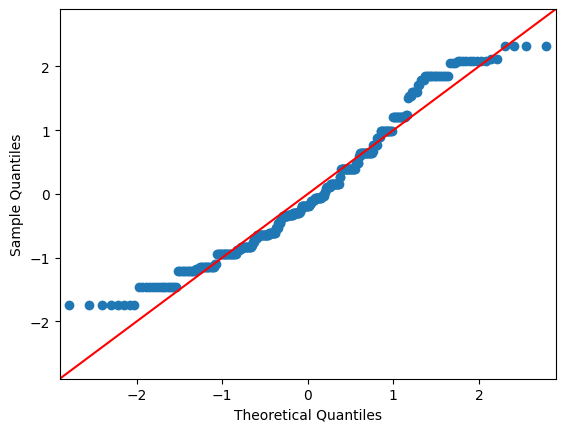

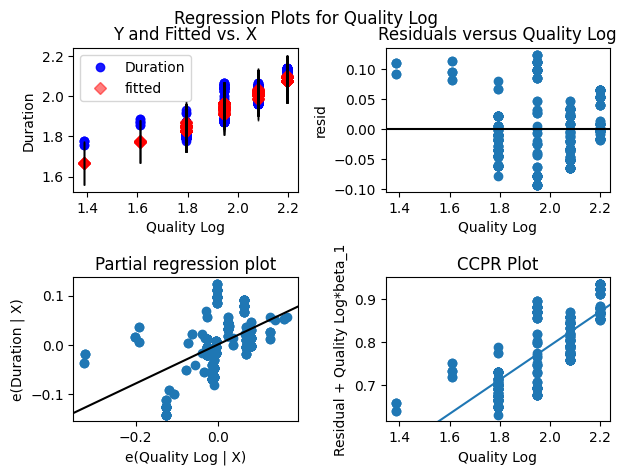

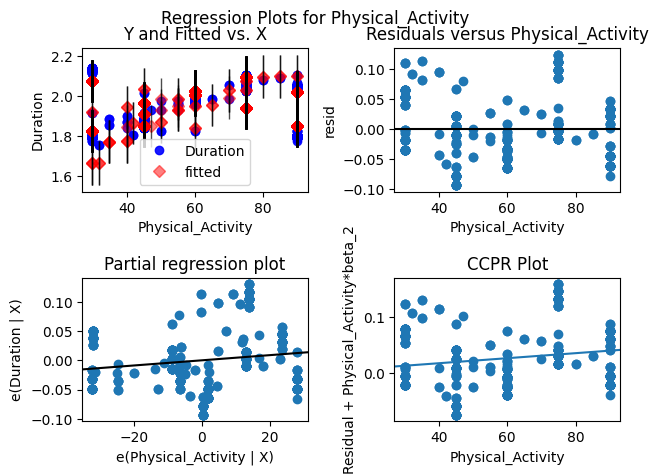

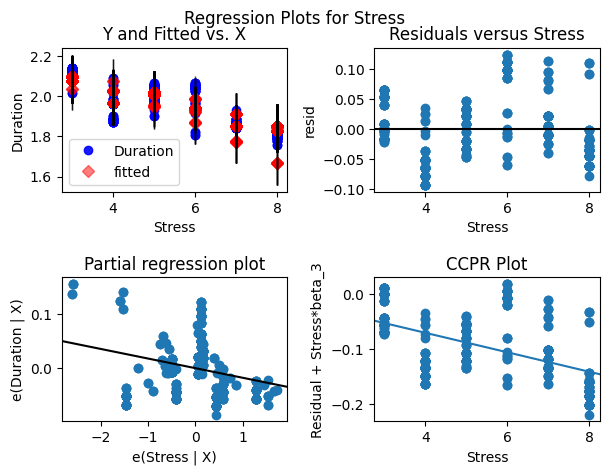

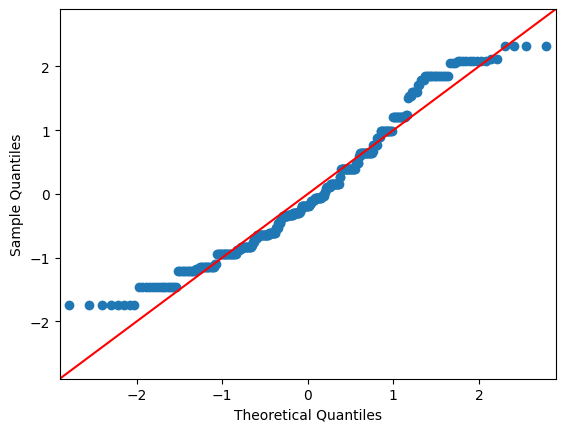

In [119]:
X=sleep_df[[X1s[1],"Physical_Activity",X3s[0]]]
Y=Ys[1]
X = sm.add_constant(X)
reg = sm.OLS(Y,X).fit()
R_adj = reg.rsquared_adj
R_adj

sm.graphics.plot_regress_exog(reg,X1s[1])
sm.graphics.plot_regress_exog(reg,"Physical_Activity")
sm.graphics.plot_regress_exog(reg,X3s[0])

fitted_y = reg.fittedvalues
residuals = reg.resid

plt.scatter(fitted_y,residuals)
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

sm.qqplot(residuals, fit=True, line="45")

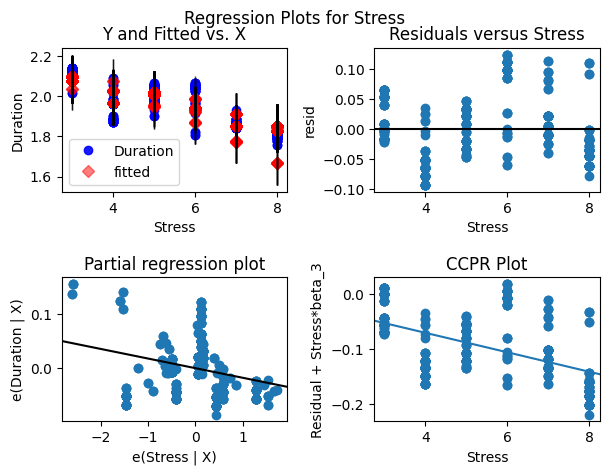

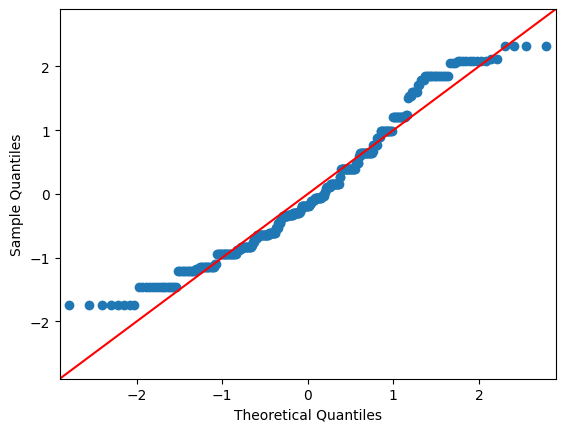

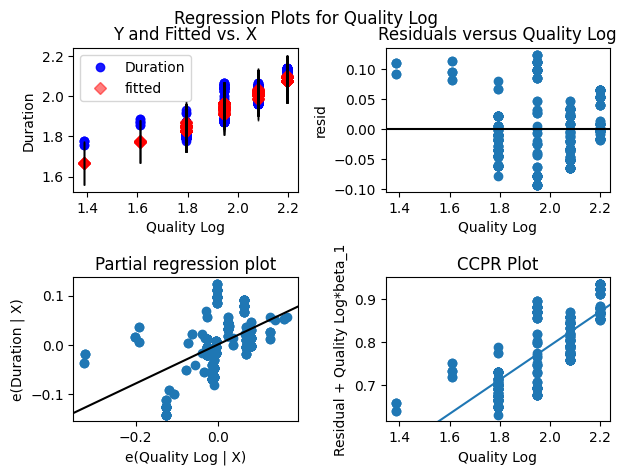

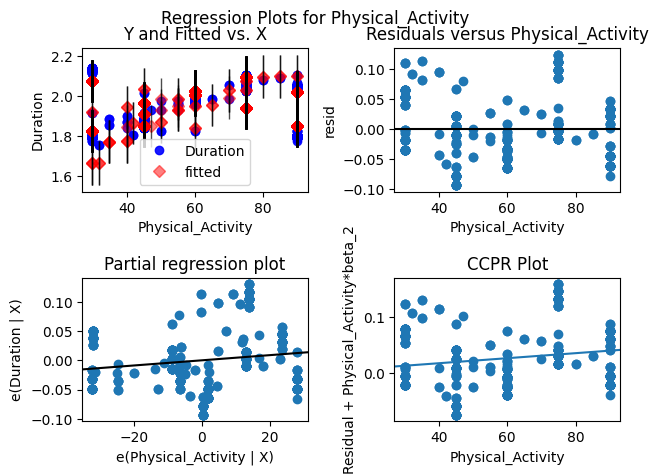

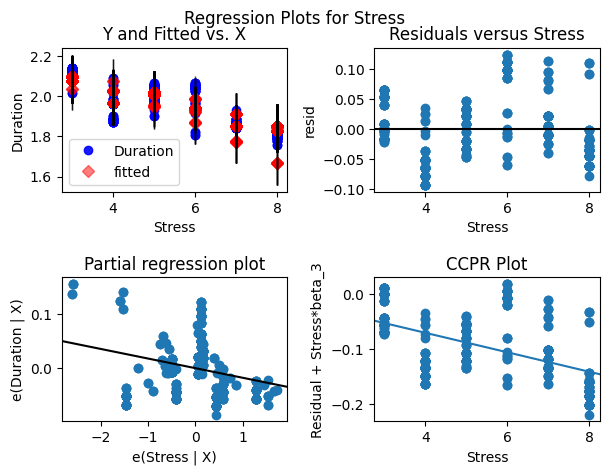

In [117]:
X=sleep_df[[X1s[1],"Physical_Activity",X3s[0]]]
Y=Ys[1]
X = sm.add_constant(X)
reg = sm.OLS(Y,X).fit()
R_adj = reg.rsquared_adj
R_adj

sm.graphics.plot_regress_exog(reg,X1s[1])
sm.graphics.plot_regress_exog(reg,"Physical_Activity")
sm.graphics.plot_regress_exog(reg,X3s[0])

fitted_y = reg.fittedvalues
residuals = reg.resid

plt.scatter(fitted_y,residuals)
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()



sm.qqplot(residuals, fit=True, line="45")


